In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [28]:
# t_score 

def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / (sample_size-1)**0.5
    return numerator / denomenator

### Hypothesis Testing

<b>Step 1:</b>

Alternate Hypothesis (Bold claim): $ H_1 \Rightarrow  >,  <, \neq  $

Null Hypothesis (Status Quo): $ H_0 \Rightarrow \leq, \geq, = $

<b>Step 2:</b>

1. Collect a sample of size n
2. Compute the mean from this sample $ \bar{x} $

<b> Step 3: </b> Compute Test Statistic:
    
If population variance is unknown $ t = \frac{\bar{x} - \mu}{s/ \sqrt[2]{n}} $
    
<b> Step 4: </b> 
    
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis. Let $ \alpha $  be 0.05 

<b> Step - 5.1</b>: Apply decision rule:

If test statistic is z-score -

Two tailed z-test: <center>  $ |z| \gt z _\frac{\alpha}{2} \Rightarrow Accept  H_1 or  Reject  H_0$ </center>

Right tailed z-test: <center> $ z \gt z _\alpha \Rightarrow Accept  H_1  or  Reject  H_0 $ </center>

Left tailed z-test: <center> $ z \lt -z _\alpha \Rightarrow Accept  H_1  or  Reject  H_0 $ </center>

If test statistic is t-score

Two tailed t-test:<center> $ |t| \gt t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept  H_1  or  Reject  H_0 $ </center>

Right tailed t-test: <center>$ t \gt t_{n-1,\alpha} \Rightarrow Accept  H_1  or  Reject  H_0 $</center>

Left tailed t-test:<center>$ t \lt t_{n-1,\alpha} \Rightarrow Accept  H_1  or  Reject  H_0 $</center>

<b>Step - 5.2</b>: Compute p-value $ P(Test Statistics | H_0) $

For two tailed test:<center>$ pvalue = 2 * (1.0 - cdf(test  statistic)) $ </center>
    
For one tailed test:<center>$ pvalue = (1.0 - cdf(test statistic)) $</center>
    
Now, $ if (p value \lt \alpha) \Rightarrow Accept  H_1  or  Reject  H_0 $




<b>Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? </b>

Step 1:

Alternate Hypothesis (Bold claim): <center> $H_1$ : Average of each packet does not contain 500 Grams of biryani  </center>
Null Hypothesis (Status Quo): <center> $H_0$ : Average of each packet contain 500 Grams of biryani    </center>

Step 2:

1. Collect the sample of size n=10     $ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $
2. Compute sample mean  $ \bar{x}  = 465.3  $

Step 3:
 
Compute t-statistic <center> $ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$ </center>

Step 4: Decide $ \alpha $ or significance level = 0.05

Step 5: 2 tailed t-test: <center>  reject $ H_0 $  if  |t|> t-critical  </center>

In [29]:
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

sum(l)/len(l)

465.3

In [30]:
# Two Tail - Calculating the t-critical value

confidence_level = 0.95

df1 = len(l) - 1
alpha = 1 - confidence_level

import scipy.stats

#find T critical value
t_critical = scipy.stats.t.ppf(q=1-0.05/2,df=df1)
print(t_critical)
print(df)

2.2621571627409915
9


In [31]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 465.3
pop_mean = 500


In [36]:
total =0
sample_std =0
for i in l :
    total+=(i - sample_mean)**2
sample_std = (total/len(l)-1)**0.5
sample_std

82.38573905719362

In [37]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

-1.2635681999251342


Text(465.3, 0.0007, 'x_bar')

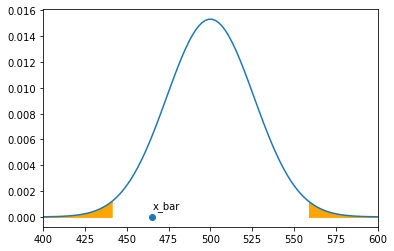

In [38]:

# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean doesnot fall in the rejection region
# i.e. here we fail to reject the Null Hypothesis

In [39]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [41]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20638505347446756
Fail to reject Null Hypothesis


<b>Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?</b>

Step 1:

Alternate Hypothesis (Bold claim): <center> $H_1$ : Average rating given by the users is greater than 4 on a scale of 1 to 5.  R > 4 </center>
Null Hypothesis (Status Quo): <center> $H_0$ : Average rating given by the users is not greater than 4  $R \leq 4$ </center>

Step 2:

1. Collect the sample of size n=20     $ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $
2. Compute sample mean  $ \bar{x}  = 4.25  $

Step 3:
 
Compute t-statistic <center> $ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$ </center>

Step 4: Decide $ \alpha $ or significance level = 0.05

Step 5: right tailed t-test: <center>  $ t \gt t_{n-1,\alpha} \Rightarrow Accept  H_1 or  Reject  H_0 $  </center>

In [83]:
l1 = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
avg = sum(l1)/len(l1)
print(avg)

4.25


In [84]:
# One Tail - Calculating the t-critical value

confidence_level = 0.95

df2 = len(l1) - 1
alpha = 1 - confidence_level

import scipy.stats

#find T critical value
t_critical = scipy.stats.t.ppf(q=1-0.05/2,df=df2)
print(t_critical)
print(df)

2.093024054408263
9


In [85]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 4.25
pop_mean = 4


In [86]:
total =0
sample_std =0
for i in l1 :
    total+=(i - sample_mean)**2
sample_std = (total/(len(l1)-1))**0.5
print(round(sample_std,4))

0.8507


In [87]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

1.2809797386801602


Text(4.25, 0.1, 'x_bar')

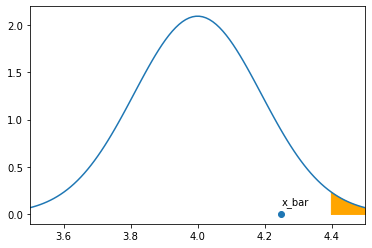

In [89]:
# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))


In [90]:
# Conclusion using z test

if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [91]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.10010039143560823
Fail to reject Null Hypothesis


<b>Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? (Given that the population std is 1)</b>

Step 1:

Alternate Hypothesis (Bold claim): <center> $H_1$ :   mileage > 15  </center>
Null Hypothesis (Status Quo): <center> $H_0$ :    $mileage  \leq 15$ </center>

Step 2:

1. Collect the sample of size n=10     $ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $
2. Compute sample mean  $ \bar{x}  = 15.098  $

Step 3:
 
Compute t-statistic <center> $ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$ </center>

Step 4: Decide $ \alpha $ or significance level = 0.05

Step 5: right tailed t-test: <center>  $ t \gt t_{n-1,\alpha} \Rightarrow Accept  H_1 or  Reject  H_0 $ </center>

In [110]:
l2 = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]
avg = sum(l2)/len(l2)
print(avg)

15.098999999999998


In [111]:
# One Tail - Calculating the t-critical value

confidence_level = 0.95

df3 = len(l2) - 1
alpha = 1 - confidence_level

import scipy.stats

#find T critical value
t_critical = scipy.stats.t.ppf(q=1-0.05/2,df=df2)
print(t_critical)
print(df3)

2.093024054408263
19


In [112]:
sample_size = 20
sample_mean = 15.1
pop_mean = 15

In [113]:
total =0
sample_std =0
for i in l2 :
    total+=(i - sample_mean)**2
sample_std = (total/(len(l2)-1))**0.5
print(round(sample_std,4))


1.0254


In [114]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

0.42510592904661115


Text(15.1, 0.1, 'x_bar')

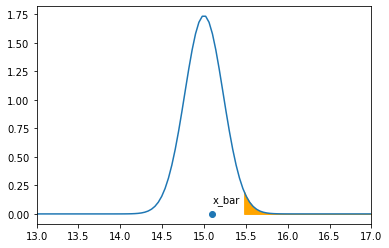

In [115]:
x_min = 13
x_max = 17

mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [116]:
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [117]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.335379727963091
Fail to reject Null Hypothesis


<b> Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?  </b>

Step 1:

Alternate Hypothesis (Bold claim): <center> $H_1$ :   t < 100ms  </center>
Null Hypothesis (Status Quo): <center> $H_0$ :    $t  \geq 100ms $ </center>

Step 2:

1. Collect the sample of size n=100    
2. Compute sample mean  $ \bar{x}  = 97.5  $

Step 3:
 
Compute t-statistic <center> $ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$ </center>

Step 4: Decide $ \alpha $ or significance level = 0.05

Step 5: left tailed t-test: <center>$ t \gt t_{n-1,\alpha} \Rightarrow Accept  H_1 or  Reject  H_0 $ </center>

In [118]:
sample_size = 100
sample_mean = 97.5
pop_mean = 100
sample_std = 7

In [119]:
# One Tail - Calculating the t-critical value

confidence_level = 0.95

df4 = sample_size - 1
alpha = 1 - confidence_level

import scipy.stats

#find T critical value
t_critical = scipy.stats.t.ppf(q=1-0.05/2,df=df4)
print(t_critical)
print(df4)

1.9842169515086827
99


In [120]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

-3.553526561095071


Text(97.5, 0.02, 'x_bar')

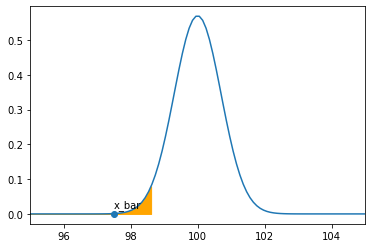

In [121]:
x_min = 95
x_max = 105

mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

In [123]:
if(t < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [124]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.00019005140582373237
Reject Null Hypothesis
